In [3]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import rgb2hex
import matplotlib.cm as cm
import plotly.express as px
import plotly.graph_objects as go
import squarify
from plotly.offline import init_notebook_mode,iplot
from wordcloud import WordCloud
import numpy as np 
from scipy import stats
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.colors 
from collections import Counter
cmap2 = cm.get_cmap('twilight',13)
colors1= []
for i in range(cmap2.N):
    rgb= cmap2(i)[:4]
    colors1.append(rgb2hex(rgb))

# Set style
sns.set(style='whitegrid')

### Load the data

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/thunderstroke325/60-Days-of-Data-Science-and-ML/main/datasets/marketing_campaign.csv', low_memory = False, sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
# Get to know your data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
# Find missing Values
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
# Statistical Analysis of your data
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [9]:
# Fill missing data in the income column with mean
df['Income'].fillna((df['Income'].mean()),inplace=True)

# Again Check for missing values
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [10]:
# Get unique values of Education Column
df.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [11]:
# Get unique values of Marital Status
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

### Data Visualization

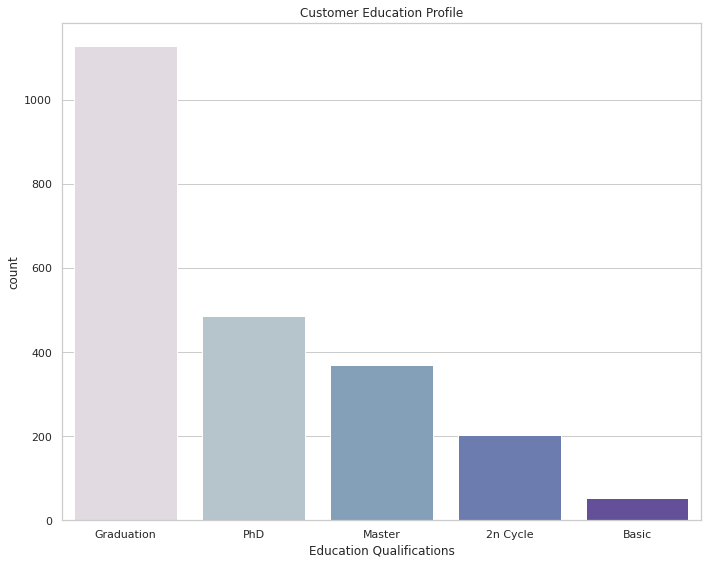

In [12]:
# Visualize Customer Education Profile
plt.figure(figsize = (10,8))
sns.countplot(x='Education',data=df,palette=colors1, order = df['Education'].value_counts().index)
plt.xlabel('Education Qualifications')
plt.title("Customer Education Profile")
plt.tight_layout()

plt.show()

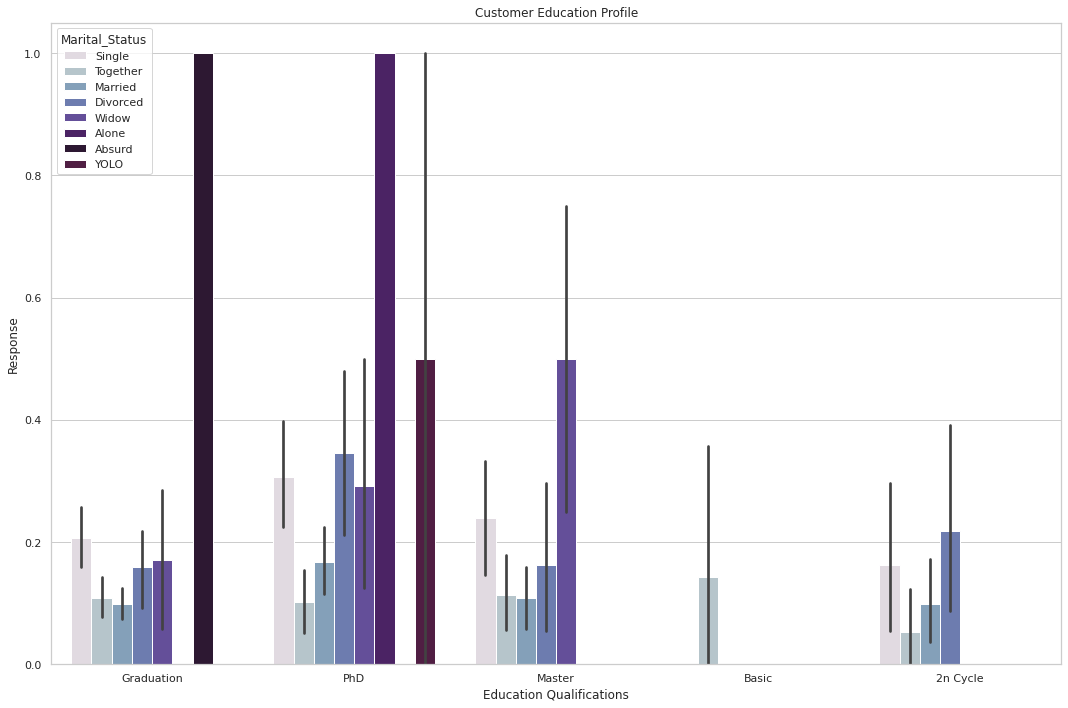

In [13]:
# Customer's Education profile and Response rate
plt.figure(figsize = (15,10))
sns.barplot(x='Education',y='Response', data=df,palette=colors1, hue='Marital_Status')
plt.xlabel('Education Qualifications')
plt.title("Customer Education Profile")
plt.tight_layout()

plt.show()

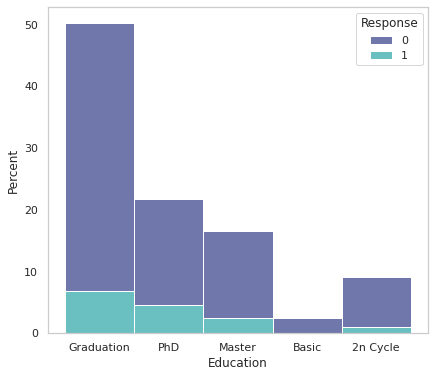

In [14]:
# Education & Response
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.histplot(x="Education", hue="Response", data=df, multiple="stack", stat="percent",palette='mako')

plt.grid(False)

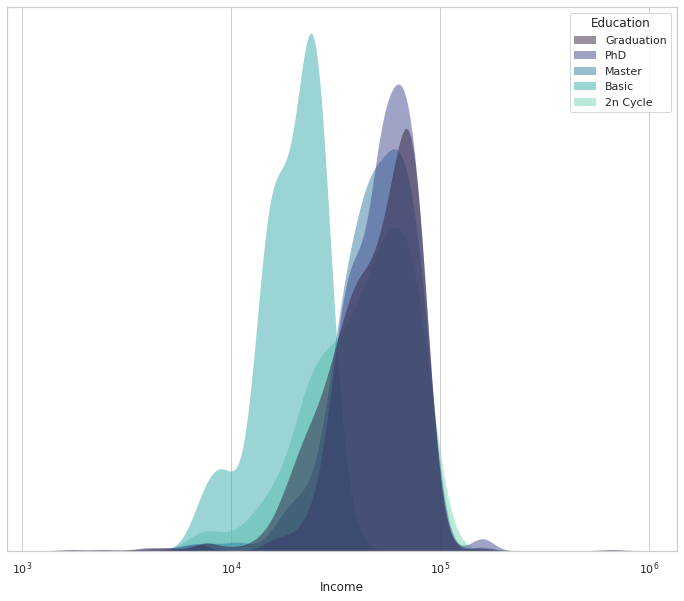

In [15]:
# Education and Income 
plt.figure(figsize=(12,10))
sns.kdeplot(
   data=df, x="Income", hue="Education", log_scale= True,
   fill=True, common_norm=False, palette='mako',
   alpha=.5, linewidth=0,
)
plt.gca().axes.get_yaxis().set_visible(False) 

plt.show()

In [16]:
# Analyze Marital Status and Purchases
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



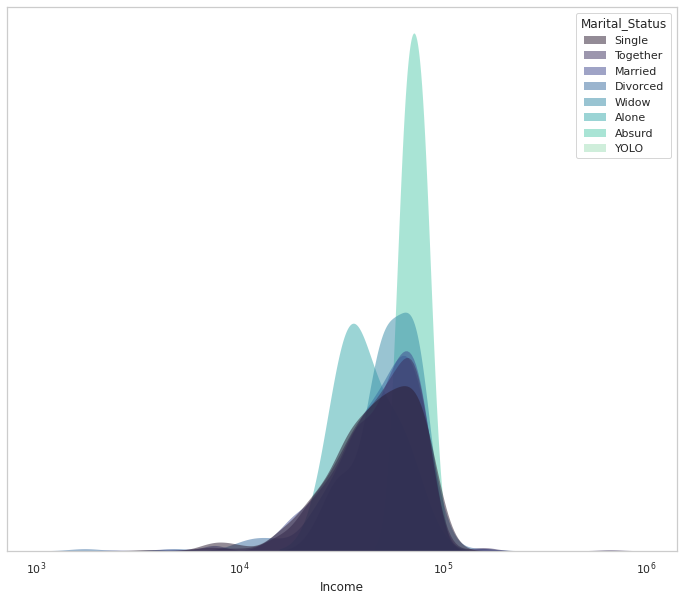

In [17]:
# Marital Status vs Income
plt.figure(figsize=(12,10))
sns.kdeplot(
   data=df, x="Income", hue="Marital_Status", log_scale= True,
   fill=True, common_norm=False, palette='mako',
   alpha=.5, linewidth=0,
)
plt.gca().axes.get_yaxis().set_visible(False) 
plt.grid(False)

plt.show()

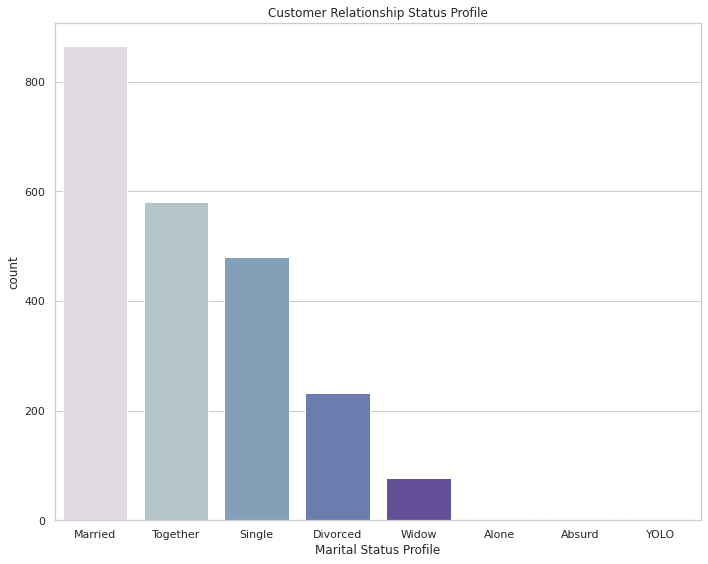

In [18]:
# Customer Relationship Status Profile
plt.figure(figsize = (10,8))
sns.countplot(x='Marital_Status',data=df,palette=colors1,order = df['Marital_Status'].value_counts().index)
plt.xlabel('Marital Status Profile')
plt.title("Customer Relationship Status Profile")
plt.tight_layout()

plt.show()

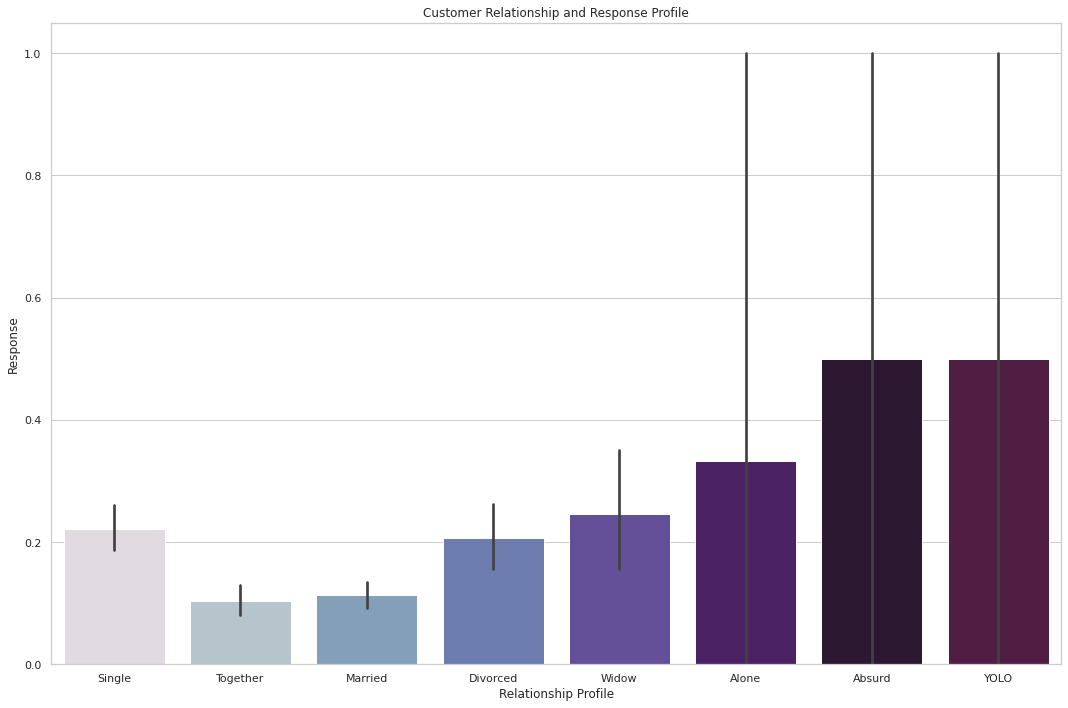

In [19]:
# Customer's Relationship profile and Response rate
plt.figure(figsize = (15,10))
sns.barplot(x='Marital_Status',y='Response', data=df,palette=colors1)
plt.xlabel('Relationship Profile')
plt.title("Customer Relationship and Response Profile")
plt.tight_layout()

plt.show()

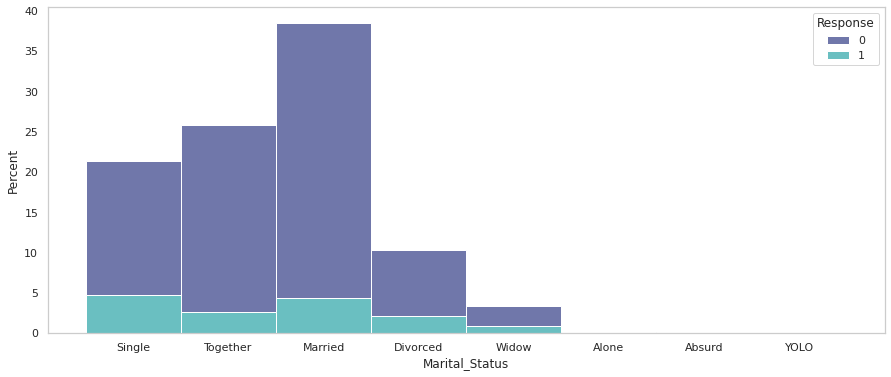

In [20]:
# Marital Status Vs Response Rate
plt.figure(figsize=(15,6))
sns.histplot( x="Marital_Status", data=df, hue="Response",stat="percent", multiple="stack",palette='mako')
plt.grid(False)

plt.show()

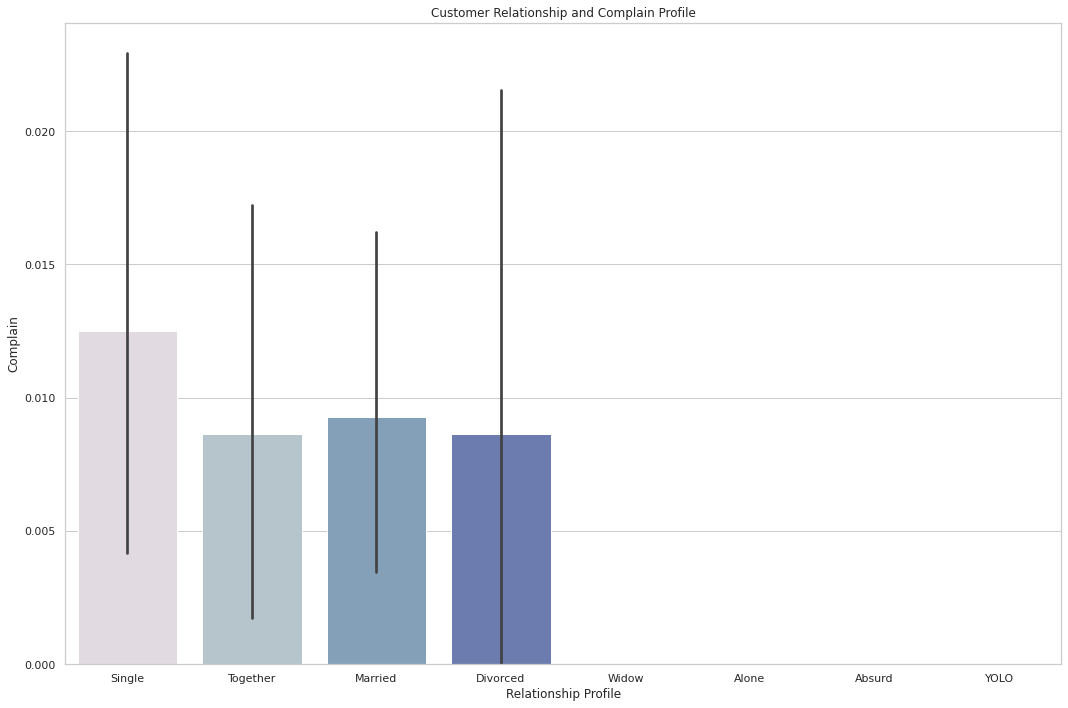

In [21]:
# Customer's Relationship profile and Complain
plt.figure(figsize = (15,10))
sns.barplot(x='Marital_Status',y='Complain', data=df,palette=colors1)
plt.xlabel('Relationship Profile')
plt.title("Customer Relationship and Complain Profile")
plt.tight_layout()

plt.show()

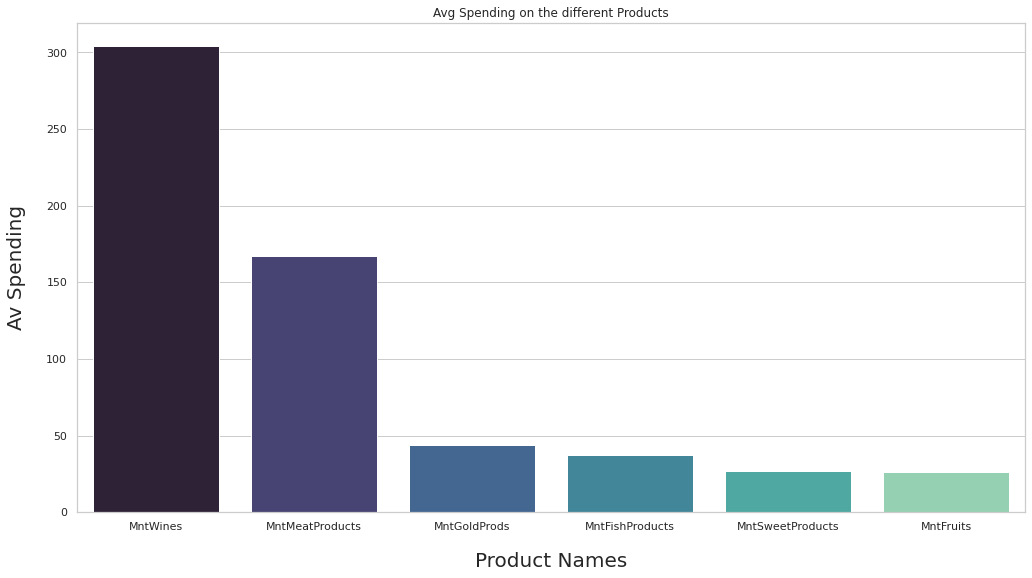

In [22]:
# Most bought products
pr = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
pr_means = pr.mean(axis=0).sort_values(ascending=False)
pr_means_df = pd.DataFrame(list(pr_means.items()), columns=['Product', 'Avg Spending'])
plt.figure(figsize=(17,9))
plt.title('Avg Spending on the different Products')
sns.barplot(data=pr_means_df, x='Product', y='Avg Spending',palette='mako');
plt.xlabel('Product Names', fontsize=20, labelpad=20)
plt.ylabel('Av Spending', fontsize=20, labelpad=20)

plt.show()

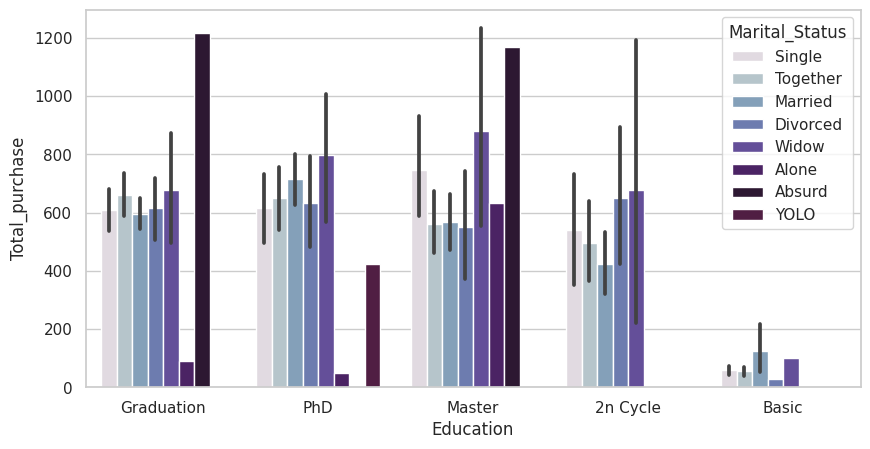

In [23]:
# Customer Age and Amount Spent on Product Purchases [ Who spent how much]
plt.figure(figsize=(10, 5),dpi=100)
df['Total_purchase'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']
#plt.subplot(1, 1, 1)
sns.barplot(x='Education',y='Total_purchase',data=df,palette=colors1,order=df['Education'].value_counts().index,hue='Marital_Status')

plt.show()

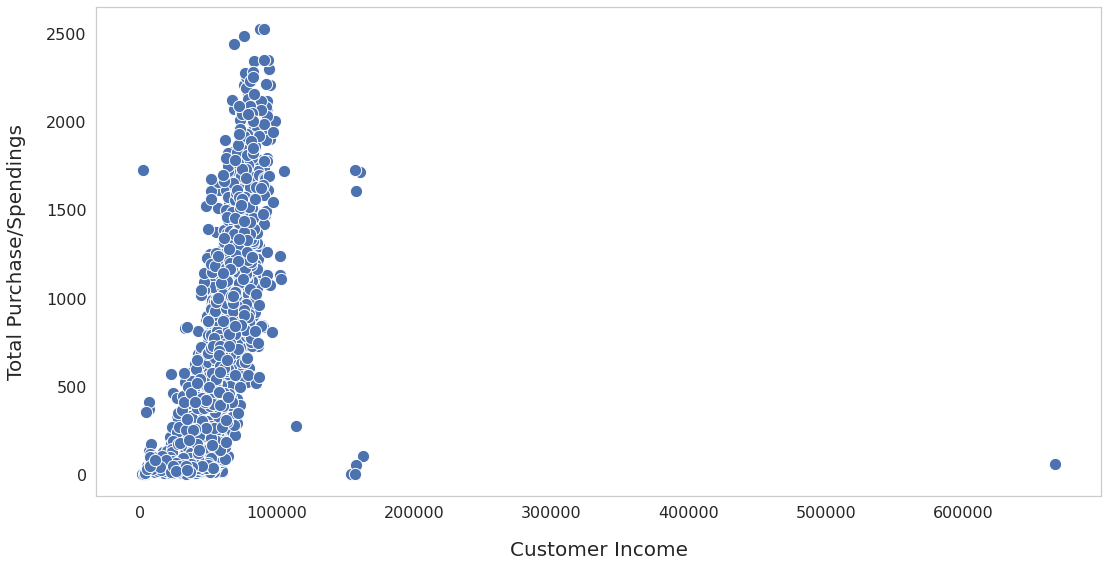

In [24]:
# Total Purchase/Spendings on diferent products by Income
plt.figure(figsize=(18,9))
sns.scatterplot(x=df['Income'], y=df['Total_purchase'], s=150,palette='mako');
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.grid(False)
plt.xlabel('Customer Income', fontsize=20, labelpad=20)
plt.ylabel('Total Purchase/Spendings', fontsize=20, labelpad=20)

plt.show()

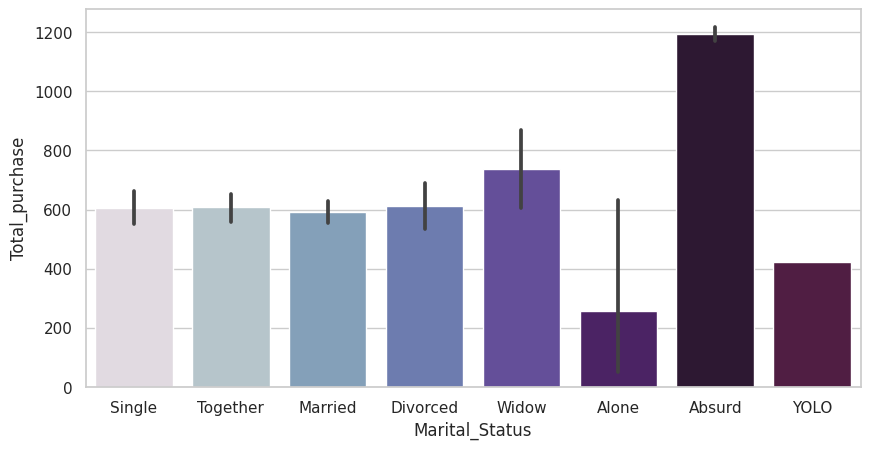

In [25]:
# Total Purchase by Marital Status
plt.figure(figsize=(10, 5),dpi=100)
sns.barplot(x='Marital_Status',y='Total_purchase',data=df,palette=colors1)

plt.show()

In [26]:
# Total places from where purchases have been made
df['Total_place_purchases'] = df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases'] + df['NumWebVisitsMonth']

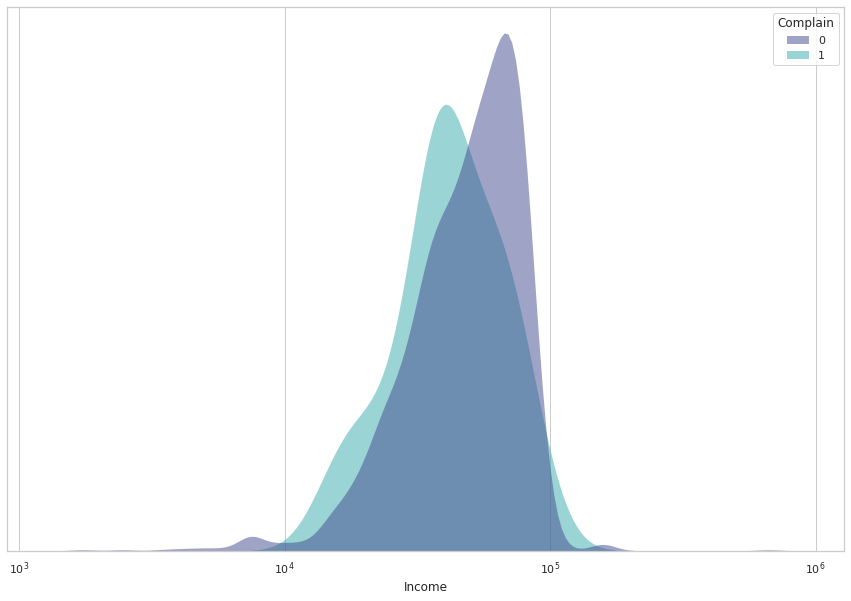

In [27]:
# Complaint Plot
plt.figure(figsize=(15,10))
sns.kdeplot(
   data=df, x="Income", hue="Complain", log_scale= True,
   fill=True, common_norm=False,palette='mako',
   alpha=.5, linewidth=0,
)
plt.gca().axes.get_yaxis().set_visible(False) 
plt.xlabel('Income')

plt.show()